In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/csv/Tipo di località e paese di residenza (IT1,122_54_DF_DCSC_TUR_10,1.0).csv')
df['OBS_VALUE'] = df['OBS_VALUE'] / 1000000
df.head()

,DATAFLOW,FREQ,REF_AREA,DATA_TYPE,ADJUSTMENT,TYPE_ACCOMMODATION,ECON_ACTIVITY_NACE_2007,COUNTRY_RES_GUESTS,LOCALITY_TYPE,URBANIZ_DEGREE,...,NOTE_ECON_ACTIVITY_NACE_2007,NOTE_COUNTRY_RES_GUESTS,NOTE_LOCALITY_TYPE,NOTE_URBANIZ_DEGREE,NOTE_COASTAL_AREA,NOTE_SIZE_BY_NUMBER_ROOMS,NOTE_TIME_PERIOD,BASE_PER,UNIT_MEAS,UNIT_MULT
0,IT1:122_54_DF_DCSC_TUR_10(1.0),A,IT,AR,N,ALL,551_553,IT,ALL,ALL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IT1:122_54_DF_DCSC_TUR_10(1.0),A,IT,AR,N,ALL,551_553,IT,ALL,ALL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IT1:122_54_DF_DCSC_TUR_10(1.0),A,IT,AR,N,ALL,551_553,IT,ALL,ALL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IT1:122_54_DF_DCSC_TUR_10(1.0),A,IT,AR,N,ALL,551_553,IT,ALL,ALL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IT1:122_54_DF_DCSC_TUR_10(1.0),A,IT,AR,N,ALL,551_553,IT,ALL,ALL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
arrivals_per_accommodation = df[(df['COUNTRY_RES_GUESTS'] == 'WORLD') & (df['TYPE_ACCOMMODATION'] != 'ALL') & (df['DATA_TYPE'] == 'AR') & (df['TIME_PERIOD'].apply(str).apply(len) <= 4) & (df['LOCALITY_TYPE'] == 'ALL')]
arrivals_hotel = arrivals_per_accommodation[arrivals_per_accommodation['TYPE_ACCOMMODATION'] == 'HOTELLIKE'].set_index('TIME_PERIOD')
arrivals_extra_hotel = arrivals_per_accommodation[arrivals_per_accommodation['TYPE_ACCOMMODATION'] != 'HOTELLIKE'].set_index('TIME_PERIOD')

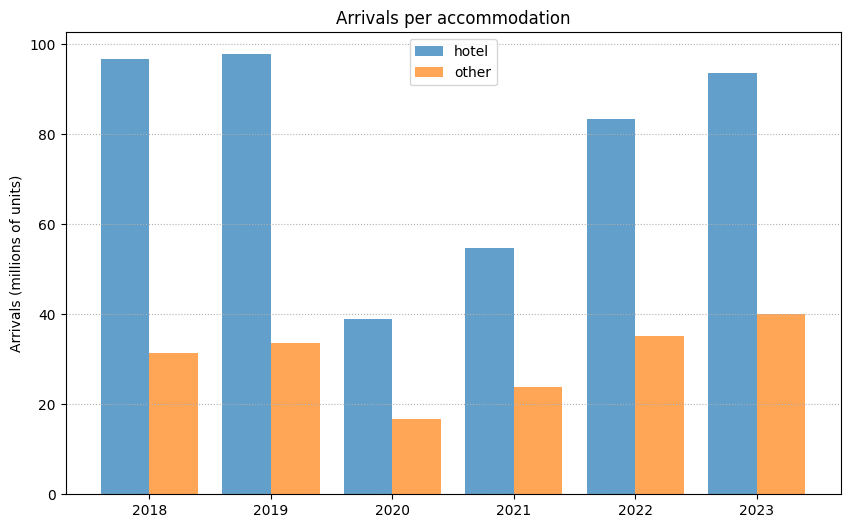

In [15]:
plt.figure(figsize=(10, 6))

width = 0.4
plt.bar(arrivals_hotel.index - width/2, arrivals_hotel['OBS_VALUE'], width, label='hotel', alpha=0.7)
plt.bar(arrivals_extra_hotel.index + width/2, arrivals_extra_hotel['OBS_VALUE'], width, label='other', alpha=0.7)

plt.ylabel("Arrivals (millions of units)")
plt.legend()
plt.title("Arrivals per accommodation")
plt.grid(True, axis='y', linestyle=':')
plt.show()

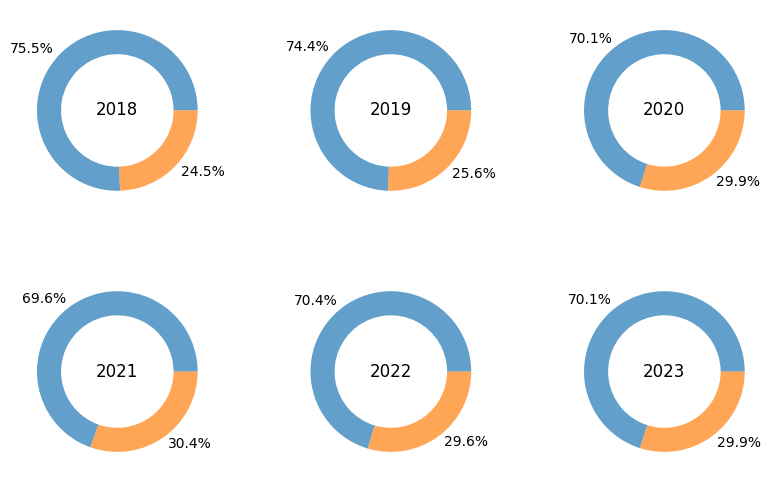

In [19]:
fig, axs = plt.subplots(2, 3, figsize=(10, 6))

years = arrivals_hotel.index
for i, year in enumerate(years):
  ax = axs[i // 3, i % 3]
  
  hotels_value = arrivals_hotel.loc[year, 'OBS_VALUE']
  other_value = arrivals_extra_hotel.loc[year, 'OBS_VALUE']
  
  hotels_perc = hotels_value / (hotels_value + other_value) * 100
  other_perc = other_value / (hotels_value + other_value) * 100
  
  ax.text(0, 0, str(year), ha='center', va='center', fontsize=12)
  wedges, texts = ax.pie(
    [hotels_value, other_value], 
    labels=[f'{hotels_perc:.1f}%', f'{other_perc:.1f}%'], 
    wedgeprops=dict(width=0.3, alpha=0.7)
  )

plt.subplots_adjust(hspace=0.3)
plt.show()